In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('data_science_job.csv')

In [4]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
2252,32321,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,Arts,0.0,50-99,NGO,13.0,0.0
3315,15878,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,8.0,50-99,Early Stage Startup,82.0,0.0
7008,10863,city_71,0.884,Male,Has relevent experience,no_enrollment,Masters,STEM,15.0,100-500,Pvt Ltd,12.0,0.0
867,33049,city_99,0.915,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,10/49,Pvt Ltd,NaN,0.0
4235,2229,city_102,NaN,Male,Has relevent experience,no_enrollment,Phd,STEM,7.0,500-999,Pvt Ltd,7.0,1.0


In [5]:
df.shape

(19158, 13)

In [6]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [7]:
## 1. REMOVING THE TUPLES..
# we will remove the tuples having missing value in the col of about less than or equal to 5%

cols = [var for var in df.columns if df[var].isnull().mean() <= 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [8]:
newdf = df[cols].dropna()

In [9]:
df.shape, newdf.shape

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

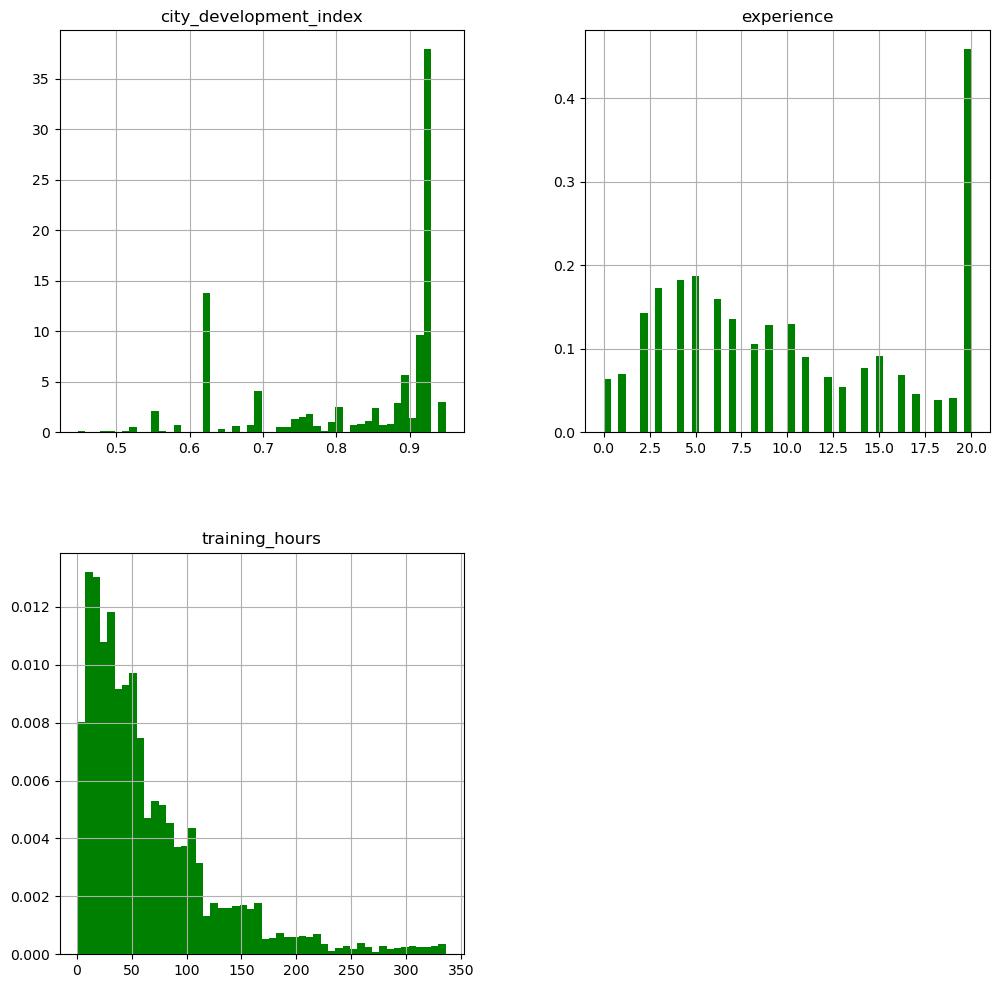

In [10]:
newdf.hist(bins = 50, density = 'True', color = 'green', figsize = (12,12))

<Axes: >

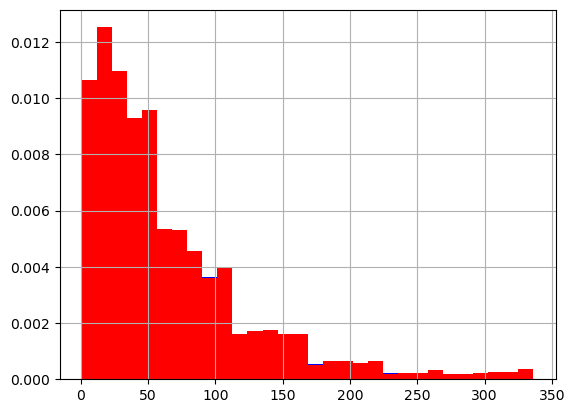

In [51]:
df['training_hours'].hist(bins = 30, density = True, color = 'blue')
newdf['training_hours'].hist(bins = 30, density = True, color = 'red')

<Axes: ylabel='Density'>

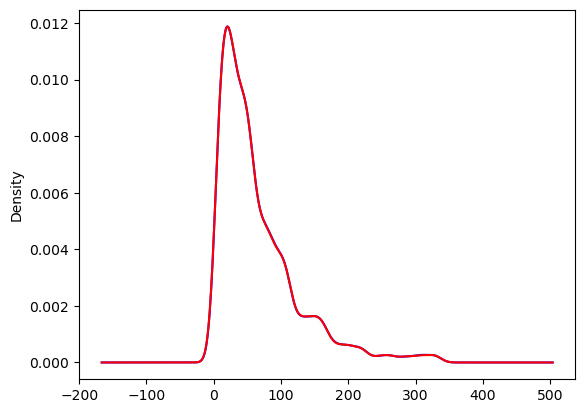

In [11]:
# Almost overlap it means after removing the tuples with missing values percent less than 5% does not effect too much in the data distribution...
df['training_hours'].plot.density(color = 'blue')
newdf['training_hours'].plot.density(color = 'red')

<Axes: ylabel='Density'>

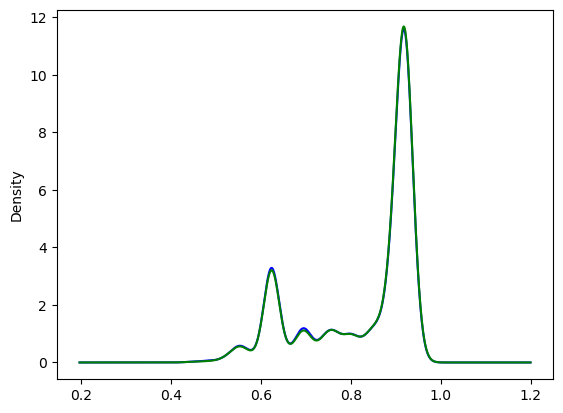

In [12]:
df['city_development_index'].plot.density(color = 'blue')
newdf['city_development_index'].plot.density(color = 'green')

<Axes: ylabel='Density'>

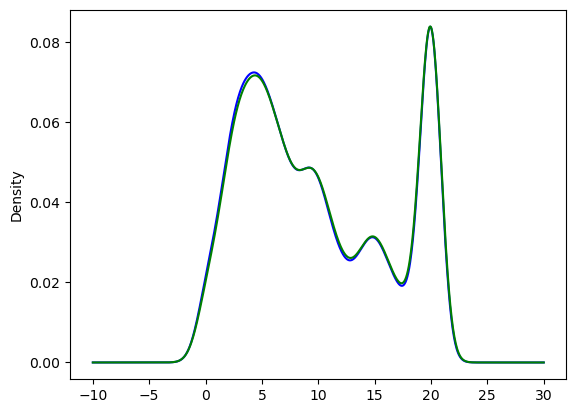

In [13]:
df['experience'].plot.density(color = 'blue')
newdf['experience'].plot.density(color = 'green')

In [14]:
## checking for categorical columns..
((df['enrolled_university'].value_counts())/len(df))*100

enrolled_university
no_enrollment       72.121307
Full time course    19.610607
Part time course     6.253262
Name: count, dtype: float64

In [15]:
((newdf['enrolled_university'].value_counts())/len(newdf))*100

enrolled_university
no_enrollment       73.518799
Full time course    20.073333
Part time course     6.407869
Name: count, dtype: float64

In [16]:
((df['education_level'].value_counts())/len(df))*100

education_level
Graduate          60.538678
Masters           22.763336
High School       10.528239
Phd                2.160977
Primary School     1.607683
Name: count, dtype: float64

In [17]:
((newdf['education_level'].value_counts())/len(newdf))*100

education_level
Graduate          61.983471
Masters           23.408218
High School       10.737982
Phd                2.211617
Primary School     1.658713
Name: count, dtype: float64

In [18]:
## 2. NUMERICAL IMPUTATION..
df = pd.read_csv('synthetic.csv', usecols = ['Price', 'Rating', 'Discount'])

In [19]:
df.sample(5)

,Price,Rating,Discount
1945,3083.0,3.154964,20.0
631,7870.0,NaN,45.0
292,6968.0,3.739367,NaN
3112,3387.0,4.130383,44.0
3021,2151.0,3.242912,2.0


In [20]:
(df.isnull().mean()*100)

Price        3.988996
Rating      46.996790
Discount     8.986703
dtype: float64

In [21]:
df['Price_mean'] = df['Price'].fillna(df['Price'].mean())
df['Price_median'] = df['Price'].fillna(df['Price'].median())

df['Rating_mean'] = df['Rating'].fillna(df['Rating'].mean())
df['Rating_median'] = df['Rating'].fillna(df['Rating'].median())

df['Discount_mean'] = df['Discount'].fillna(df['Discount'].mean())
df['Discount_median'] = df['Discount'].fillna(df['Discount'].median())

In [22]:
df.head(5)

,Price,Rating,Discount,Price_mean,Price_median,Rating_mean,Rating_median,Discount_mean,Discount_median
0,5548.0,1.870322,0.0,5548.0,5548.0,1.870322,1.870322,0.0,0.0
1,3045.0,4.757798,38.0,3045.0,3045.0,4.757798,4.757798,38.0,38.0
2,4004.0,NaN,0.0,4004.0,4004.0,3.038293,3.082060,0.0,0.0
3,4808.0,1.492085,33.0,4808.0,4808.0,1.492085,1.492085,33.0,33.0
4,1817.0,NaN,23.0,1817.0,1817.0,3.038293,3.082060,23.0,23.0


In [23]:
df.isnull().mean()*100

Price               3.988996
Rating             46.996790
Discount            8.986703
Price_mean          0.000000
Price_median        0.000000
Rating_mean         0.000000
Rating_median       0.000000
Discount_mean       0.000000
Discount_median     0.000000
dtype: float64

<Axes: ylabel='Density'>

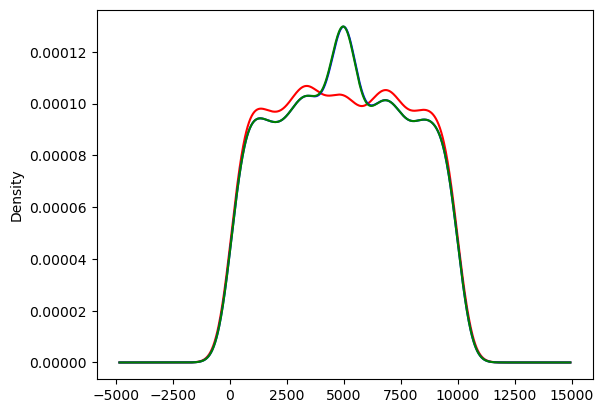

In [24]:
df['Price'].plot(kind = 'kde', color = 'red')
df['Price_mean'].plot(kind = 'kde', color = 'blue')
df['Price_median'].plot(kind = 'kde', color = 'green')

<Axes: ylabel='Density'>

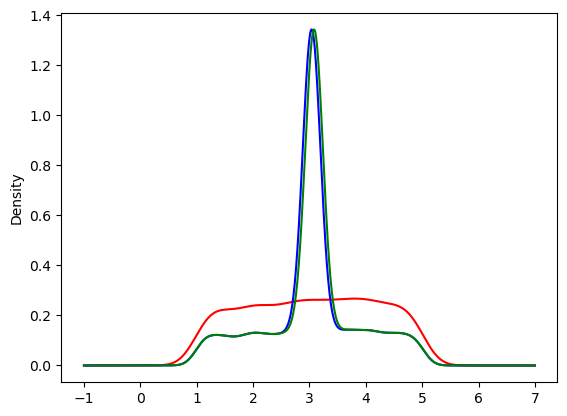

In [25]:
df['Rating'].plot(kind = 'kde', color = 'red')
df['Rating_mean'].plot(kind = 'kde', color = 'blue')
df['Rating_median'].plot(kind = 'kde', color = 'green')

<Axes: ylabel='Density'>

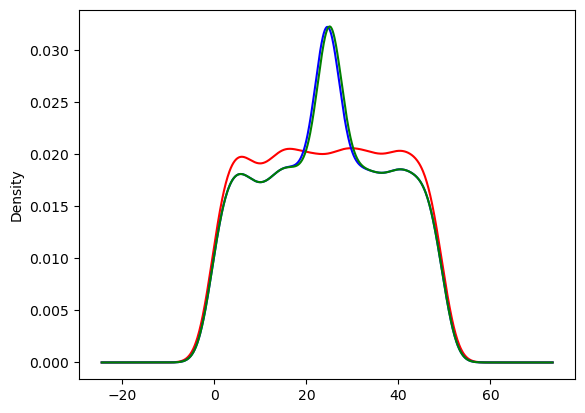

In [26]:
df['Discount'].plot(kind = 'kde', color = 'red')
df['Discount_mean'].plot(kind = 'kde', color = 'blue')
df['Discount_median'].plot(kind = 'kde', color = 'green')

In [27]:
df.corr()

,Price,Rating,Discount,Price_mean,Price_median,Rating_mean,Rating_median,Discount_mean,Discount_median
Price,1.000000,0.021099,0.009300,1.000000,1.000000,0.015474,0.015216,0.008861,0.008804
Rating,0.021099,1.000000,0.015028,0.020682,0.020685,1.000000,1.000000,0.014304,0.014040
Discount,0.009300,0.015028,1.000000,0.009085,0.009060,0.011079,0.011178,1.000000,1.000000
Price_mean,1.000000,0.020682,0.009085,1.000000,0.999999,0.015165,0.014912,0.008661,0.008606
Price_median,1.000000,0.020685,0.009060,0.999999,1.000000,0.015167,0.014914,0.008638,0.008583
Rating_mean,0.015474,1.000000,0.011079,0.015165,0.015167,1.000000,0.999656,0.010567,0.010372
Rating_median,0.015216,1.000000,0.011178,0.014912,0.014914,0.999656,1.000000,0.010659,0.010463
Discount_mean,0.008861,0.014304,1.000000,0.008661,0.008638,0.010567,0.010659,1.000000,0.999949
Discount_median,0.008804,0.014040,1.000000,0.008606,0.008583,0.010372,0.010463,0.999949,1.000000


np.float64(23.530639941538784)

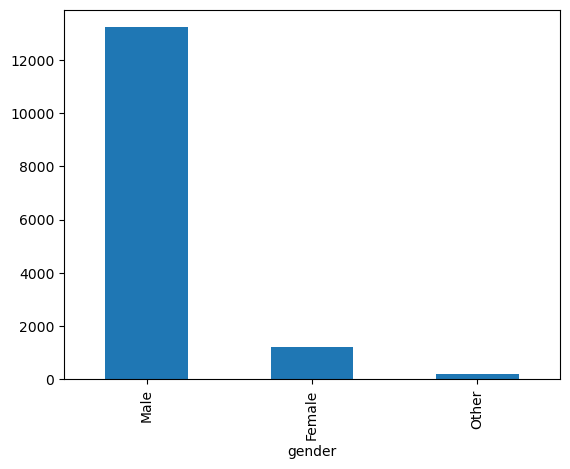

In [88]:
df1 = pd.read_csv('data_science_job.csv')
df1['gender'].value_counts().plot(kind = 'bar')
df1['gender'].isnull().mean()*100
## hence we can replace the missing value in gender with male..

In [71]:
newdf = df1['gender'].fillna(df1['gender'].mode()[0])

In [72]:
df1['gender'].isnull().mean()*100

np.float64(23.530639941538784)

<Axes: >

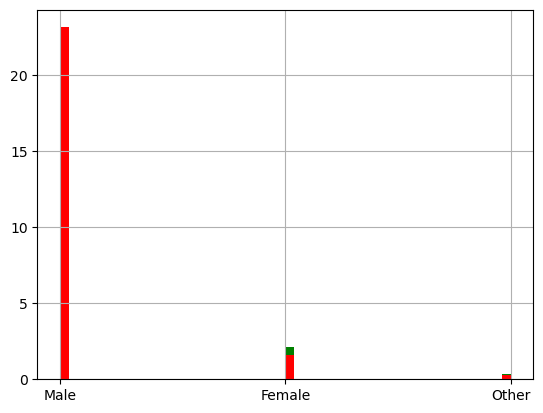

In [75]:
import seaborn as sns
df1['gender'].hist(bins = 50, density = 'True', color = 'green')
newdf.hist(bins = 50, density = 'True', color = 'red')

In [112]:
## Missing Indicator
# it is used to tell the model that the rew contains a missing value 
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.model_selection import train_test_split

In [114]:
mi = MissingIndicator()
x_train, x_test, y_train, y_test = train_test_split(df1.drop(columns = ['target']), df1['target'], test_size = 0.3)
mi.fit(x_train)
newdf = mi.transform(x_train)

In [106]:
x_train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours
2310,19834,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,8.0,5000-9999,Pvt Ltd,7.0
8552,20226,city_103,0.920,NaN,No relevent experience,Full time course,Graduate,STEM,7.0,NaN,NaN,47.0
5240,21068,city_1,0.847,Male,Has relevent experience,no_enrollment,NaN,NaN,19.0,10/49,Pvt Ltd,30.0
18829,25065,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,4.0,500-999,Pvt Ltd,192.0
1534,16729,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,NaN,NaN,43.0


In [108]:
newdf = pd.DataFrame(newdf, columns = mi.get_feature_names_out(x_train.columns), index = x_train.index)

In [110]:
x_train = pd.concat([x_train, newdf], axis = 1)

In [123]:
x_train.head(5)

## OR

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours
2302,7222,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16.0,1000-4999,Pvt Ltd,9.0
7467,31867,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,100-500,Pvt Ltd,57.0
2813,8254,city_102,0.804,Female,Has relevent experience,no_enrollment,Masters,STEM,11.0,100-500,Pvt Ltd,41.0
10816,15119,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,10/49,Pvt Ltd,11.0
15987,28464,city_28,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,15.0,10000+,Pvt Ltd,34.0


In [117]:
si = SimpleImputer(add_indicator = True, strategy = 'most_frequent')

In [118]:
newdf1 = si.fit_transform(x_train)

In [121]:
newdf1 = pd.DataFrame(newdf1, columns = si.get_feature_names_out(x_train.columns), index = x_train.index)

In [122]:
newdf1.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,training_hours,missingindicator_city_development_index,missingindicator_gender,missingindicator_enrolled_university,missingindicator_education_level,missingindicator_major_discipline,missingindicator_experience,missingindicator_company_size,missingindicator_company_type,missingindicator_training_hours
2302,7222,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,16.0,1000-4999,...,9.0,False,False,False,False,False,False,False,False,False
7467,31867,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,100-500,...,57.0,False,False,False,False,False,False,False,False,False
2813,8254,city_102,0.804,Female,Has relevent experience,no_enrollment,Masters,STEM,11.0,100-500,...,41.0,False,False,False,False,False,False,False,False,False
10816,15119,city_160,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,10/49,...,11.0,False,False,False,False,False,False,False,False,False
15987,28464,city_28,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,15.0,10000+,...,34.0,False,False,False,False,False,False,False,False,False
